## 18.6 Homework

Write a program to find the minium of 
    $$ f(x,y) = x^2/2 + y^2/3 - xy/4 $$
    
- 1, from your own code (except Monte Carlo)
- 2, from scipy

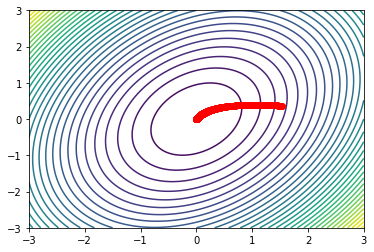

minimum:  6.71223497874e-06   number of iterations:   1001


In [22]:
#combining components from lecture 18
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4

def derivative(f, xy, d=0.01):
    x, y = xy[0], xy[1]
    fx = (f([x+d/2,y])-f([x-d/2,y]))/d
    fy = (f([x,y+d/2])-f([x,y-d/2]))/d
    return np.array([fx,fy])

xmin, xmax= -3,3
ymin, ymax= -3,3

def initial(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

nx = np.linspace(xmin,xmax,400)
ny = np.linspace(ymin,ymax,400)

x,y = np.meshgrid(nx,ny)

def minimize_fix(f,x0, N=1000):
    xnow = x0
    converged = False
    xhist = []
    xhist.append(xnow)
    dx = 0.01

    for i in range(N):
        
        dfnow = derivative(f, xnow) 
        xnext = xnow - dfnow*dx
       
        if f(xnext)>f(xnow):
            converged = True
            break
        else:
            xnow = xnext
            xhist.append(xnow)

    return converged, np.array(xhist), f(xnow)

[x0, y0] = initial(xmin, xmax, ymin, ymax)
converged, xhist, fmin = minimize_fix(f, [x0,y0])
x,y = np.meshgrid(nx,ny)
z = f([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)

plt.plot(xhist[:,0], xhist[:,1], 'ro-')
plt.show()
print('minimum: ', fmin, '  number of iterations:  ', len(xhist))

In [27]:
from scipy.optimize import minimize
res= minimize(f, [x0,y0], method='BFGS', tol=1e-5, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 28
         Gradient evaluations: 7
